<a href="https://colab.research.google.com/github/egriboff/Perception_proj4/blob/main/Fish_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

if len(os.listdir("/content/drive/MyDrive/Fishes")) == 0:
    with zipfile.ZipFile("/content/drive/MyDrive/Fish_Data.zip") as zip_ref:
        zip_ref.extractall("/content/drive/MyDrive/Fishes")


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import pandas as pd
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import notebook
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import keras

In [ ]:
data_dir = "/content/drive/MyDrive/Fishes/Fishes"

In [ ]:
batch_size = 64
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


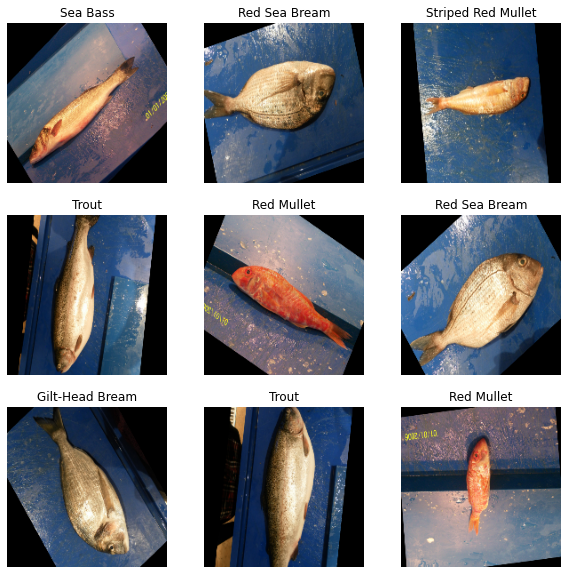

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
# model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=10
# )

Epoch 1/10
225/225 [==============================] - 391s 2s/step - loss: 0.9853 - accuracy: 0.6739 - val_loss: 7.0275 - val_accuracy: 0.1517
Epoch 2/10
225/225 [==============================] - 312s 1s/step - loss: 0.0899 - accuracy: 0.9707 - val_loss: 2.1938 - val_accuracy: 0.6033
Epoch 3/10
225/225 [==============================] - 313s 1s/step - loss: 0.0208 - accuracy: 0.9953 - val_loss: 0.9002 - val_accuracy: 0.7467
Epoch 4/10
225/225 [==============================] - 312s 1s/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.1463 - val_accuracy: 0.9528
Epoch 5/10
225/225 [==============================] - 314s 1s/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.2368 - val_accuracy: 0.9233
Epoch 6/10
225/225 [==============================] - 313s 1s/step - loss: 0.0434 - accuracy: 0.9839 - val_loss: 0.3756 - val_accuracy: 0.9061
Epoch 7/10
225/225 [==============================] - 312s 1s/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 2.1061 - val_accuracy: 0.6733

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=113, generator=train_ds, validation_data= val_ds, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


113/113 [==============================] - 462s 4s/step - loss: 0.8311 - accuracy: 0.7188 - val_loss: 5.5029 - val_accuracy: 0.1969
Epoch 2/10
113/113 [==============================] - 410s 4s/step - loss: 0.0765 - accuracy: 0.9693 - val_loss: 6.0804 - val_accuracy: 0.1250
Epoch 3/10
113/113 [==============================] - 423s 4s/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 8.2405 - val_accuracy: 0.1656
Epoch 4/10
113/113 [==============================] - 420s 4s/step - loss: 0.0346 - accuracy: 0.9867 - val_loss: 5.4682 - val_accuracy: 0.3859
Epoch 5/10
113/113 [==============================] - 410s 4s/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 1.1638 - val_accuracy: 0.7703
Epoch 6/10
113/113 [==============================] - 423s 4s/step - loss: 0.0356 - accuracy: 0.9896 - val_loss: 1.0995 - val_accuracy: 0.7703
Epoch 7/10
113/113 [==============================] - 422s 4s/step - loss: 0.0387 - accuracy: 0.9850 - val_loss: 3.1556 - val_accuracy: 0.6344
Epoch 8/10

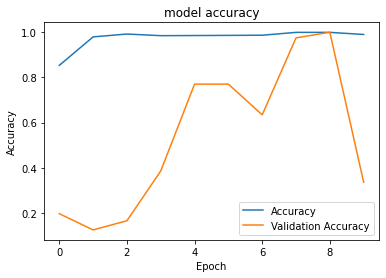

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

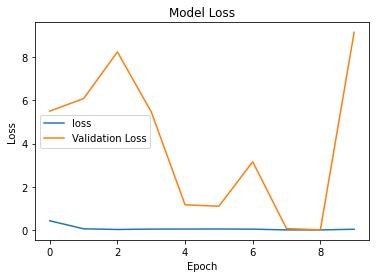

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["accuracy"])
# plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()